다음과 같이 4개의 행으로 이루어진 직각삼각형 모양으로 된 판에 숫자들이 주어졌을 때, 최상단에서 시작하여 최하단으로 이동했을 때 얻을 수 있는 최대 합을 구해보려고 합니다.

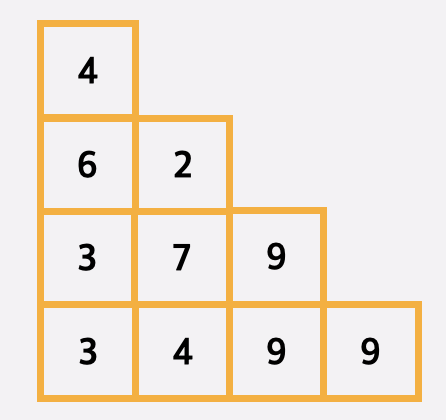

단, 특정 위치 (r, c)에서의 이동은 (r+1, c) 혹은 (r+1, c+1) 지점으로만 가능합니다.<br>

예를 들어 다음과 같이 내려갔을 경우, 좌측의 경우에는 점수 21을 얻게 되지만, 우측의 경우에는 점수 26을 얻게 됩니다.

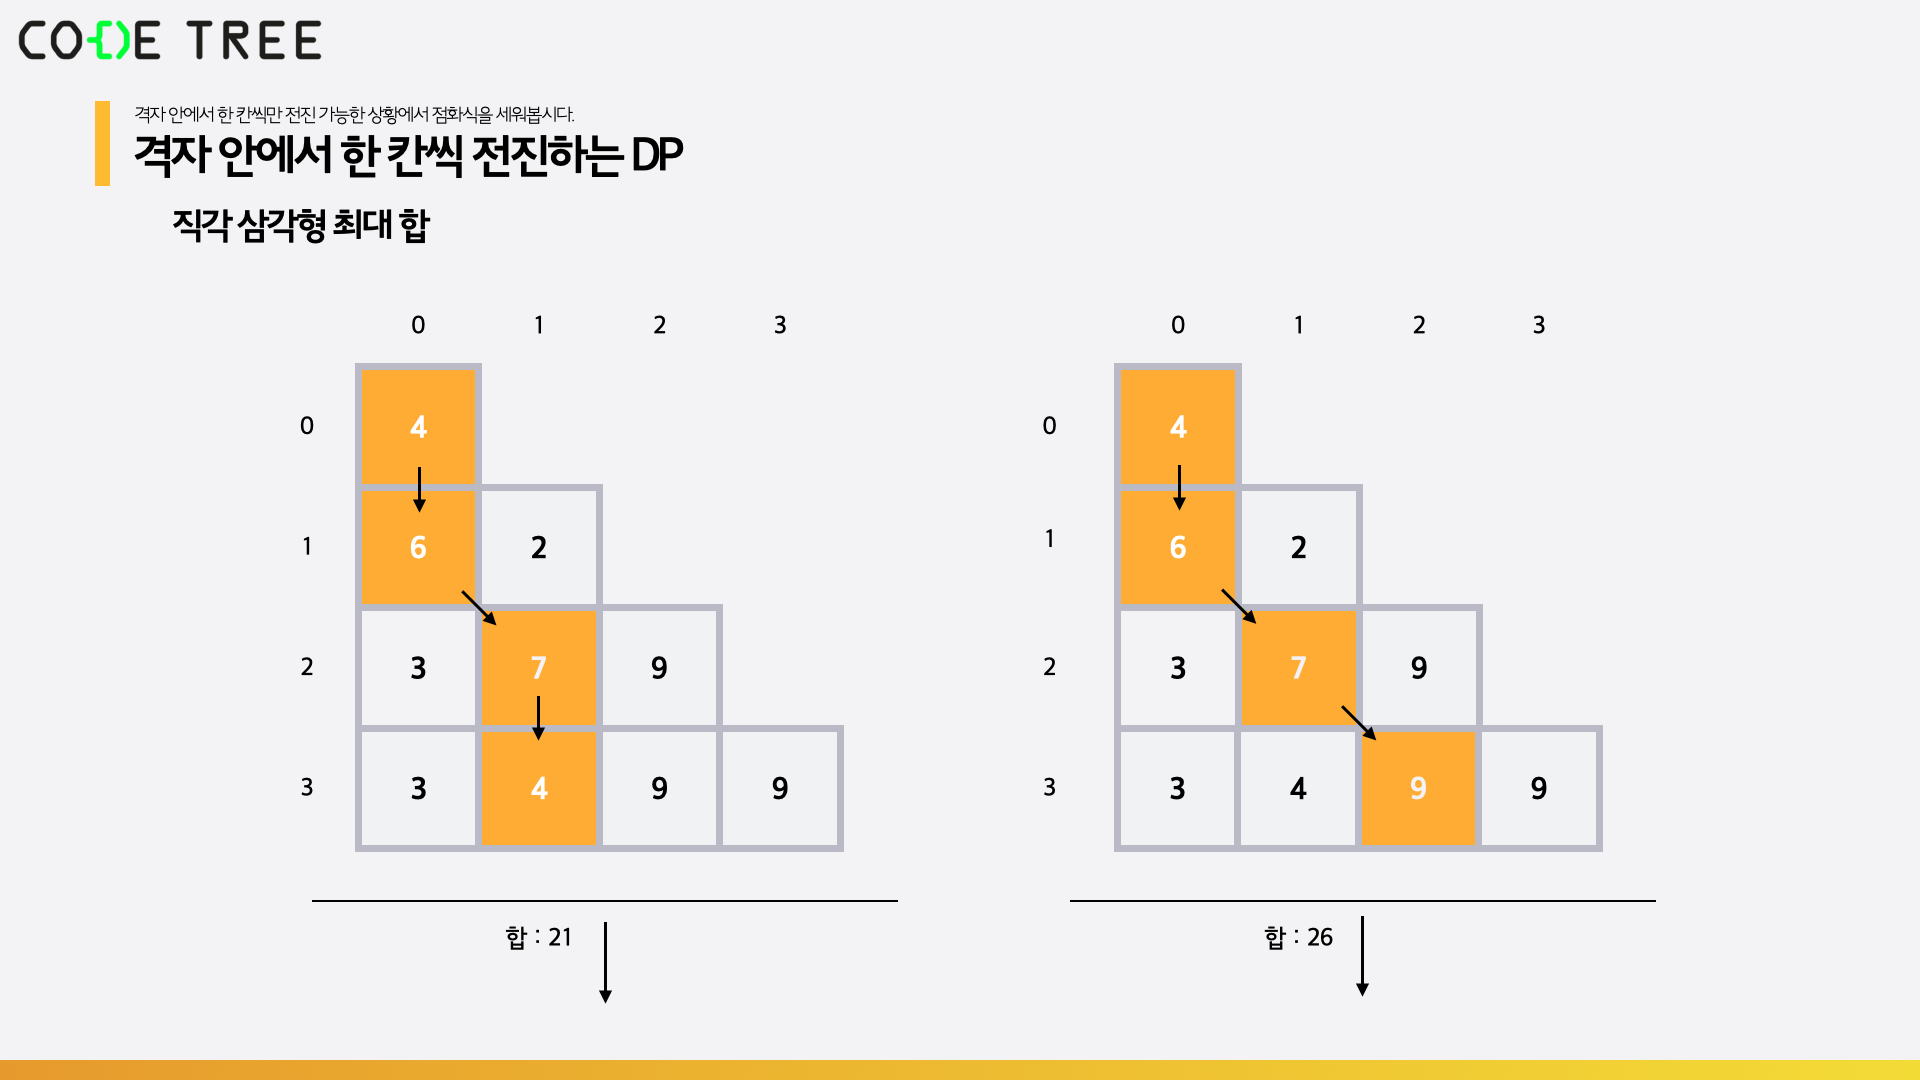

그렇다고 큰 숫자로만 따라 내려간다고 항상 더 좋은 값을 기대할 수는 없습니다. 예를 들어 다음 경우에는 우측처럼 아래로만 내려가는 것이 더 좋은 결과를 가져오게 됩니다.

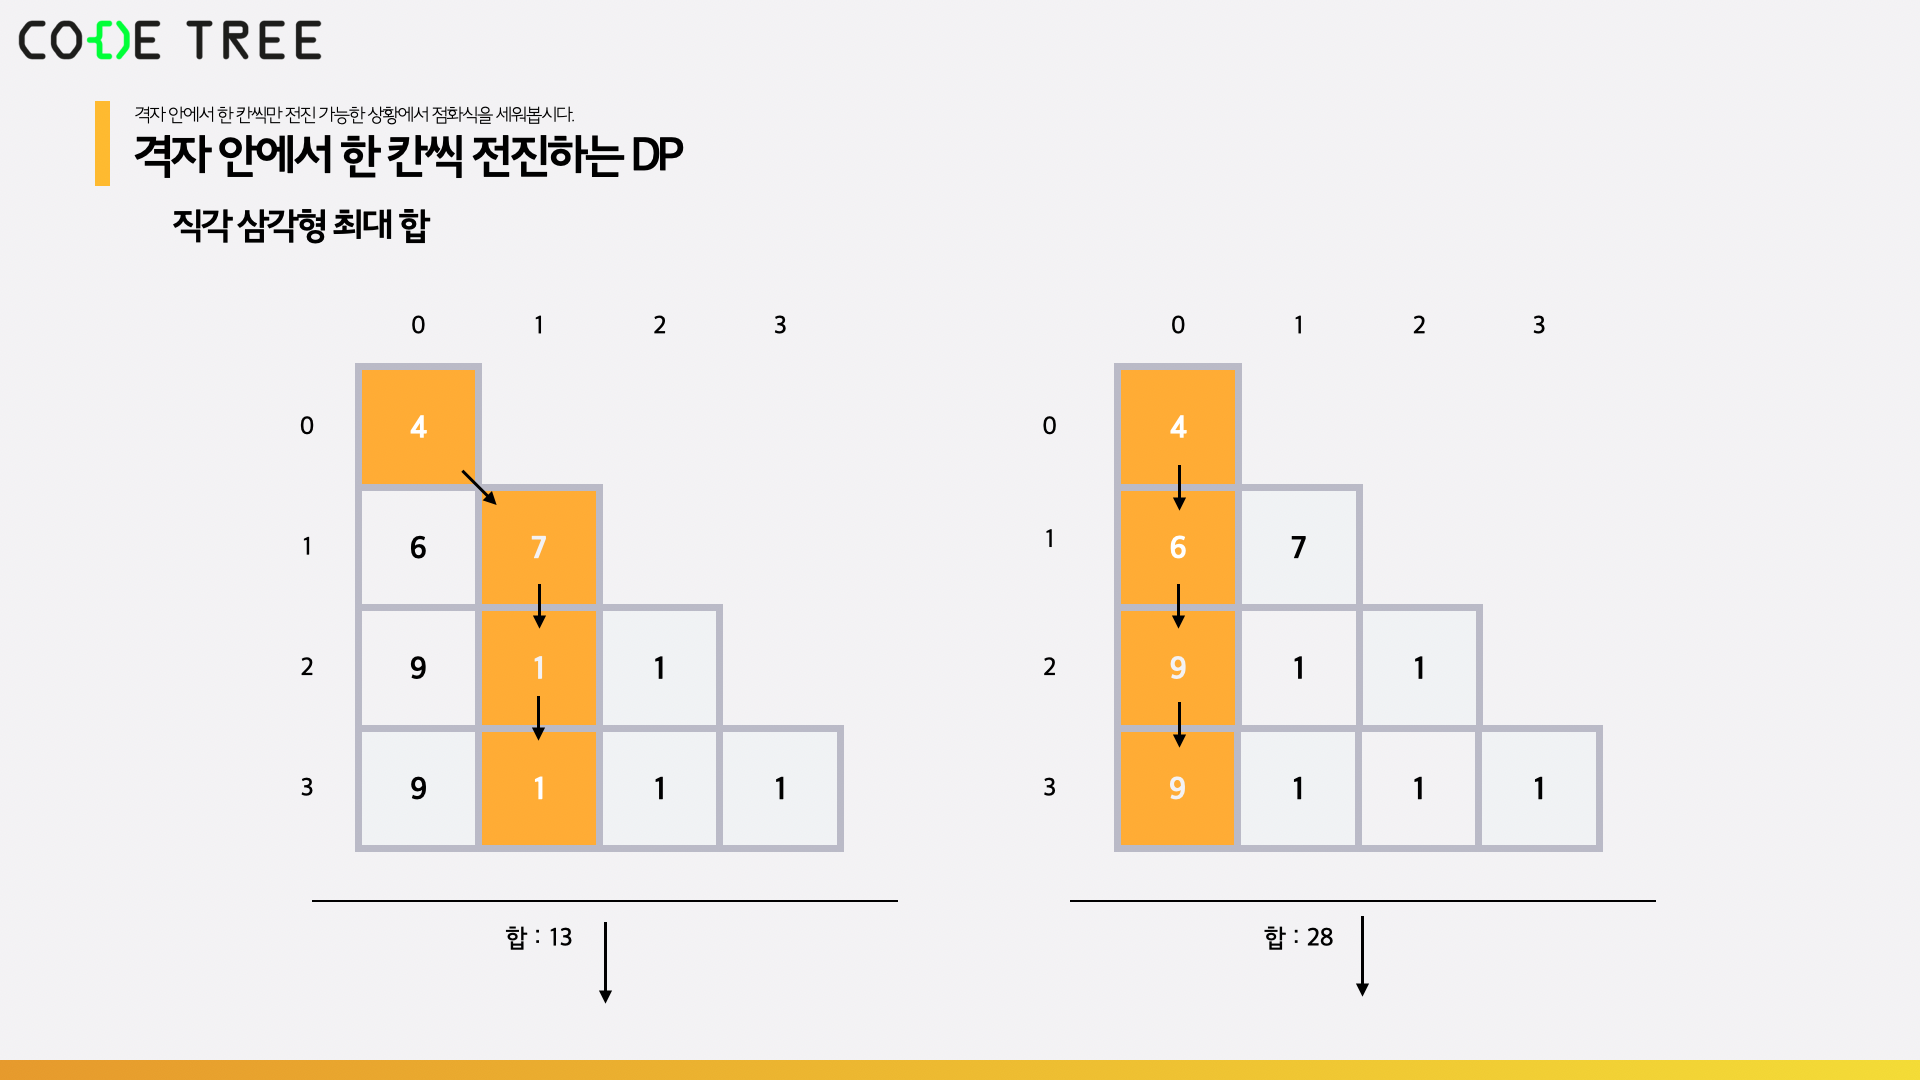

아래 그림에서 좌측의 경우는 아래, 아래, 대각선 방향으로 이동하였고, 앞으로 4번째 행부터 더 진행을 하려고 하는 상황입니다. 우측의 경우는 대각선, 아래, 아래 방향으로 이동하였고, 앞으로 4번째 행부터 더 진행을 하려고 하는 상황입니다.

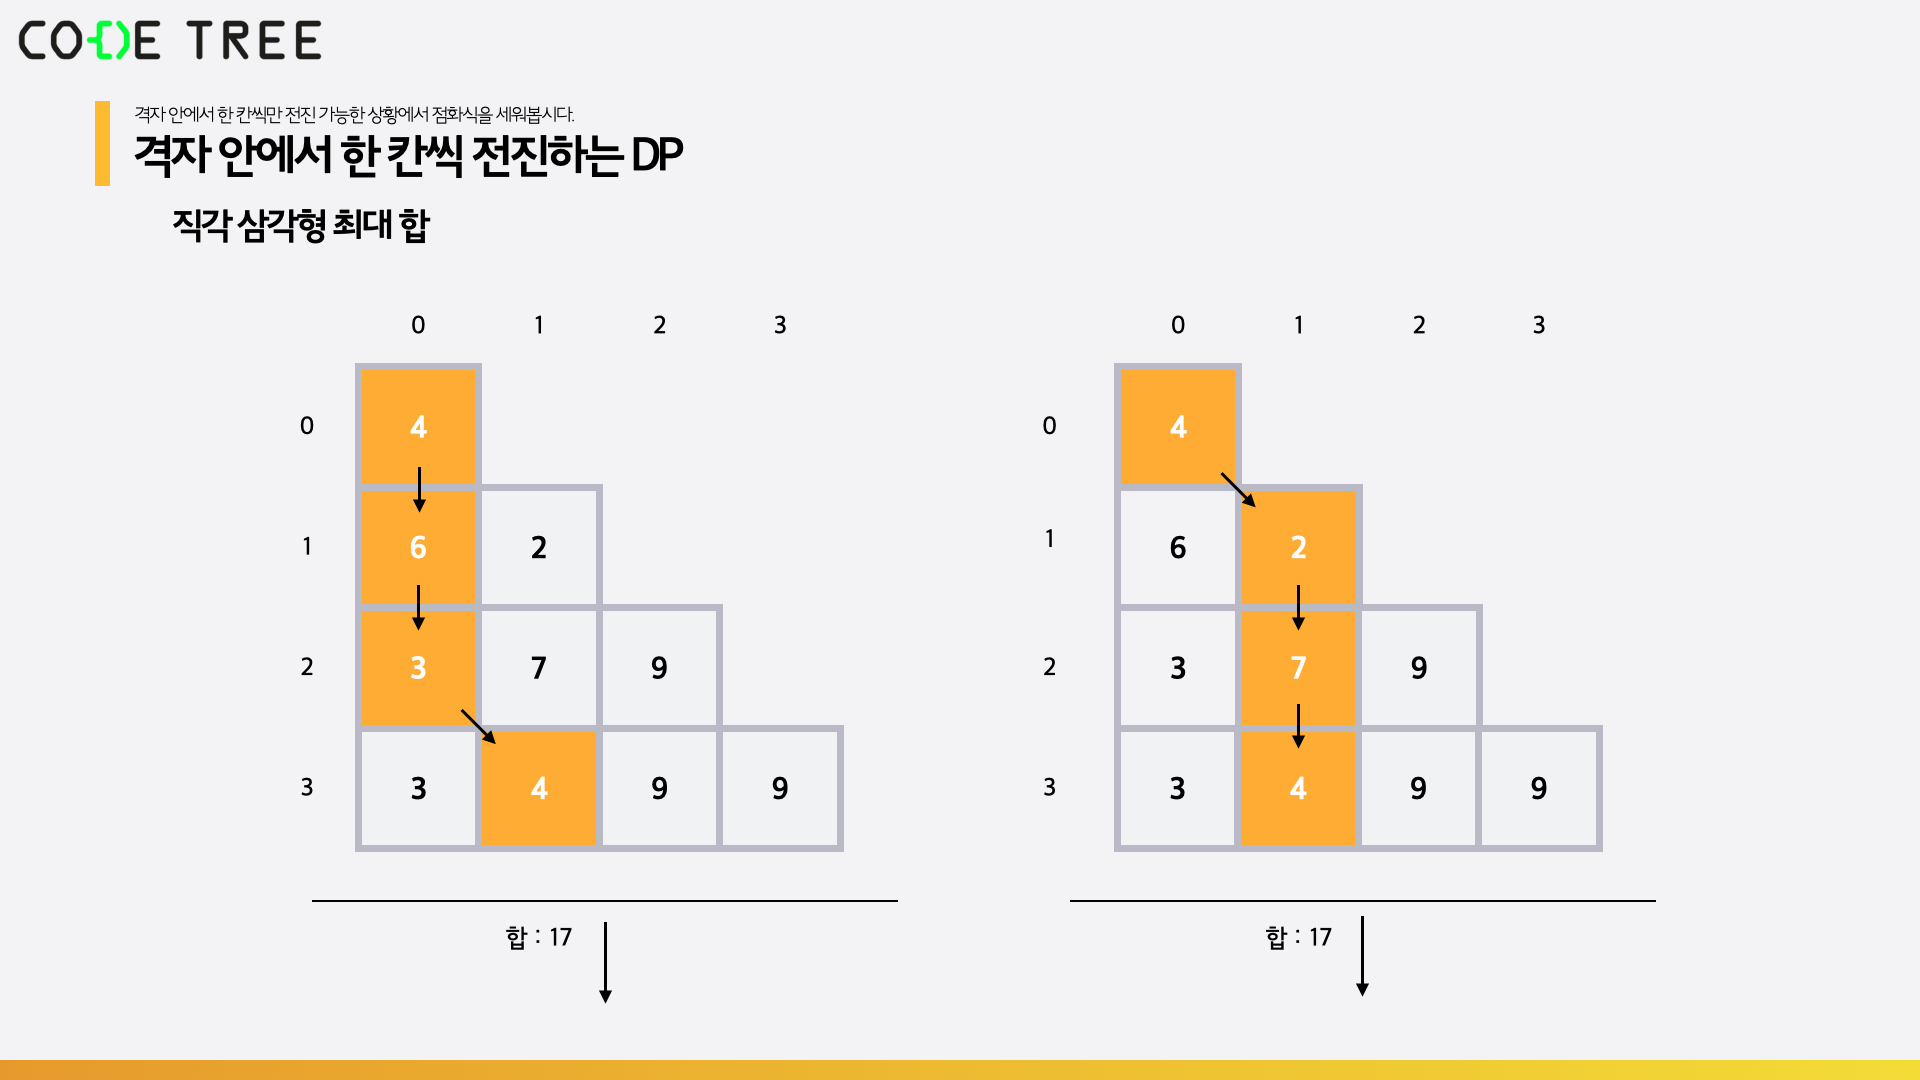

이러한 상황에서 4번째 행에서부터 적절하게 이동해 경로상의 숫자 합을 최대로 만드려는 관점에서 보았을 때, 앞으 두 상황은 동등한 상황이라고 생각할 수 있습니다. 왜냐하면 해당 문제에서는 '마지막으로 방문한 위치'와 '이동한 경로 상의 숫자 합'이 일치하는 경우, 그 이후의 입장에서 보았을 때 동일한 상황으로 간주할 수 있기 때문입니다.<br>

즉 이 문제에서는 다음의 두 가지가 일치하는 경우, 그 이후의 입장에서 보았을 때 동일한 상황으로 간주할 수 있습니다.<br>

마지막으로 방문한 위치<br>

이동한 경로 상의 숫자 합

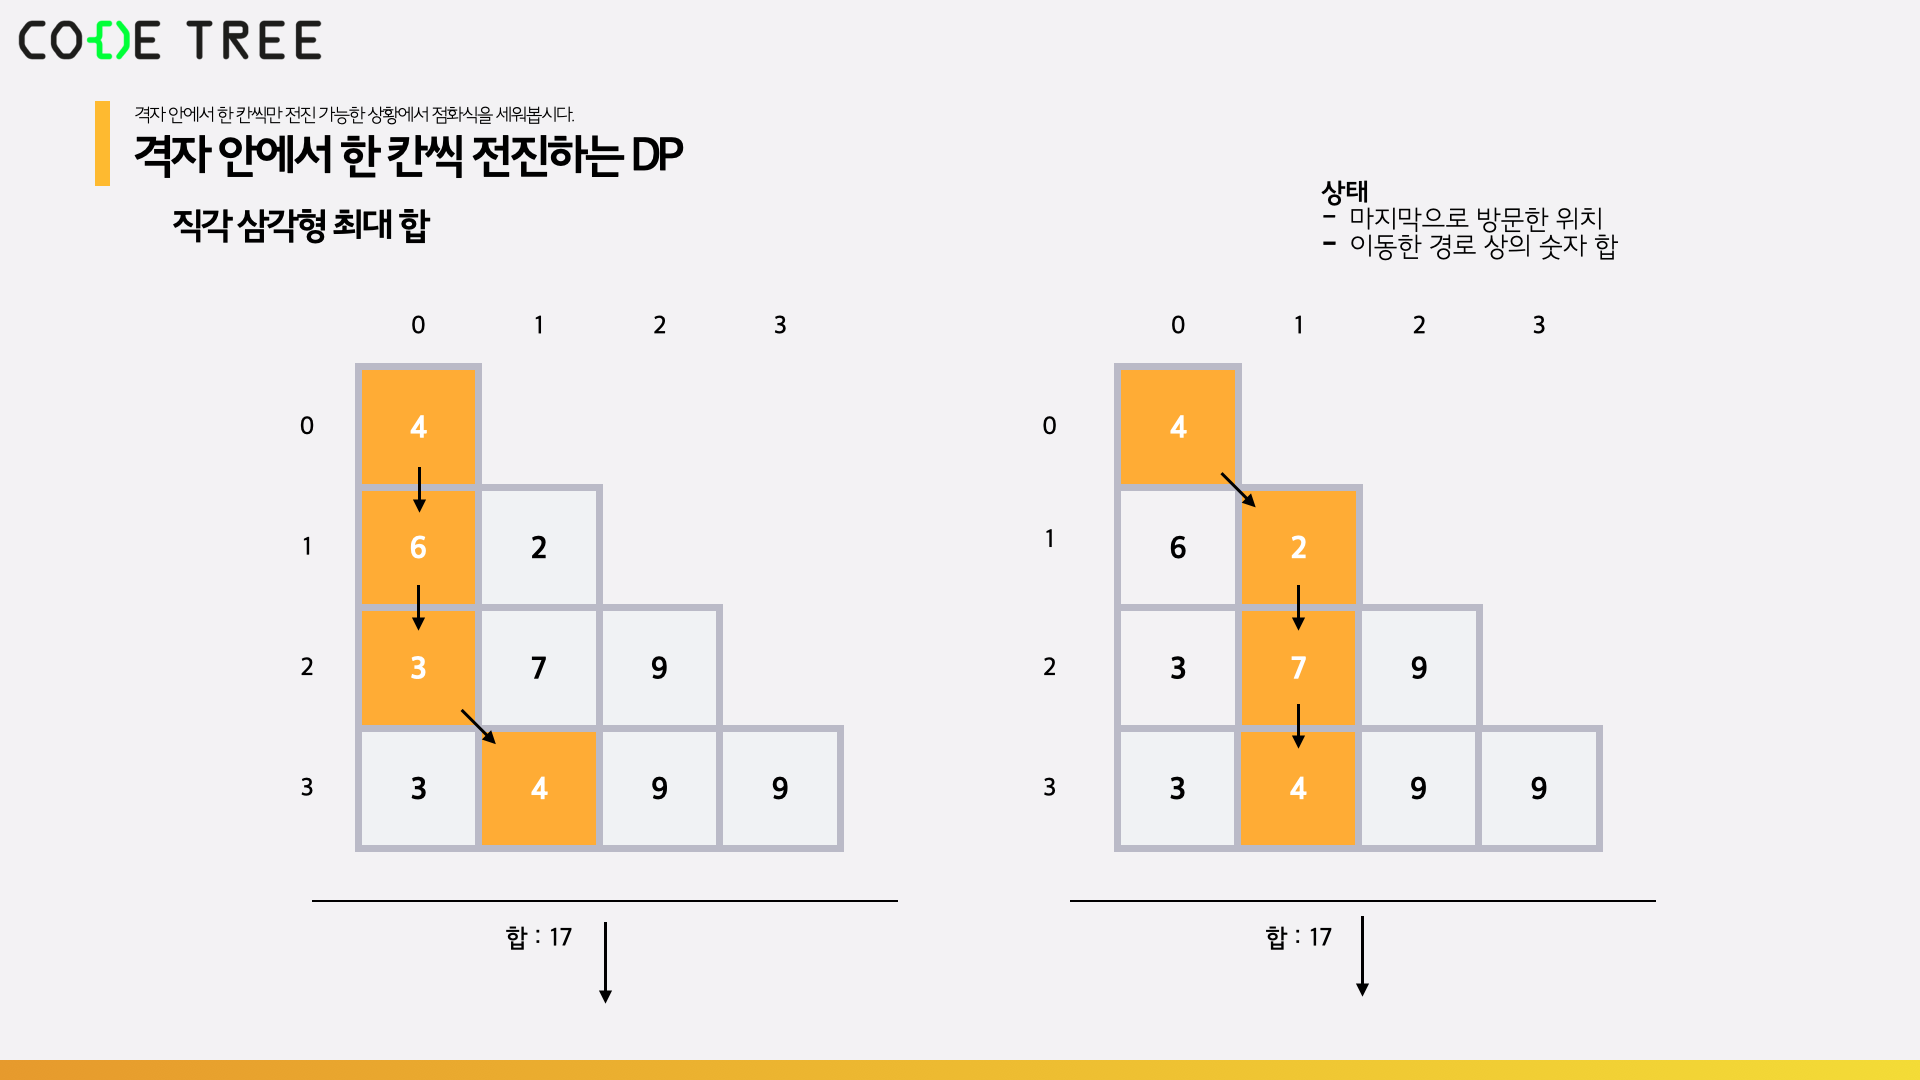

따라서 이 문제를 다음과 같이 해석해 볼 수 있습니다.<br>

‘마지막으로 방문한 위치’가 같다면, ‘이동한 경로 상의 숫자 합’은 클수록 더 좋다.

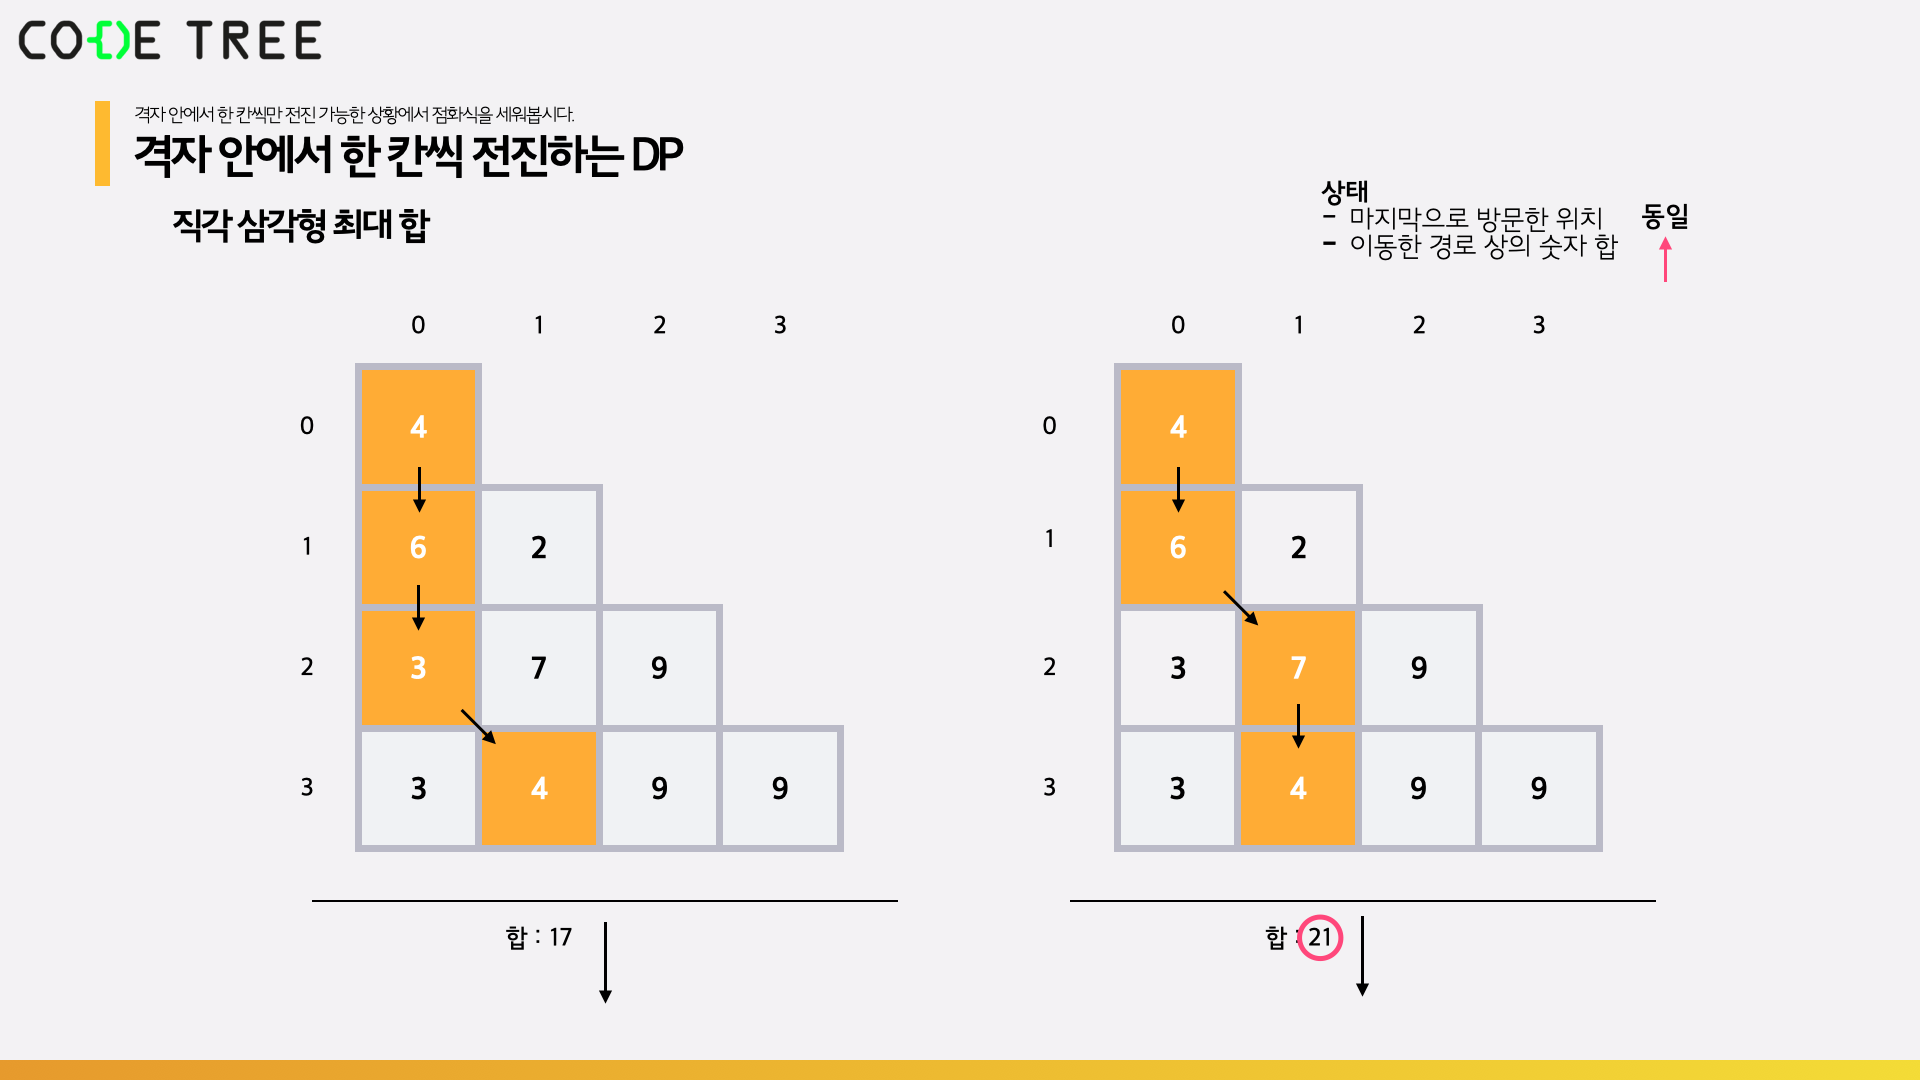

해당 솔루션에서는 이러한 특징을 이용해 점화식을 세워 문제를 해결해보도록 하겠습니다. 이때 dp[i][j]에 대한 정의를 마지막으로 방문한 위치를 (i, j)라 했을 때, 얻을 수 있는 최대 합이라고 해봅시다.

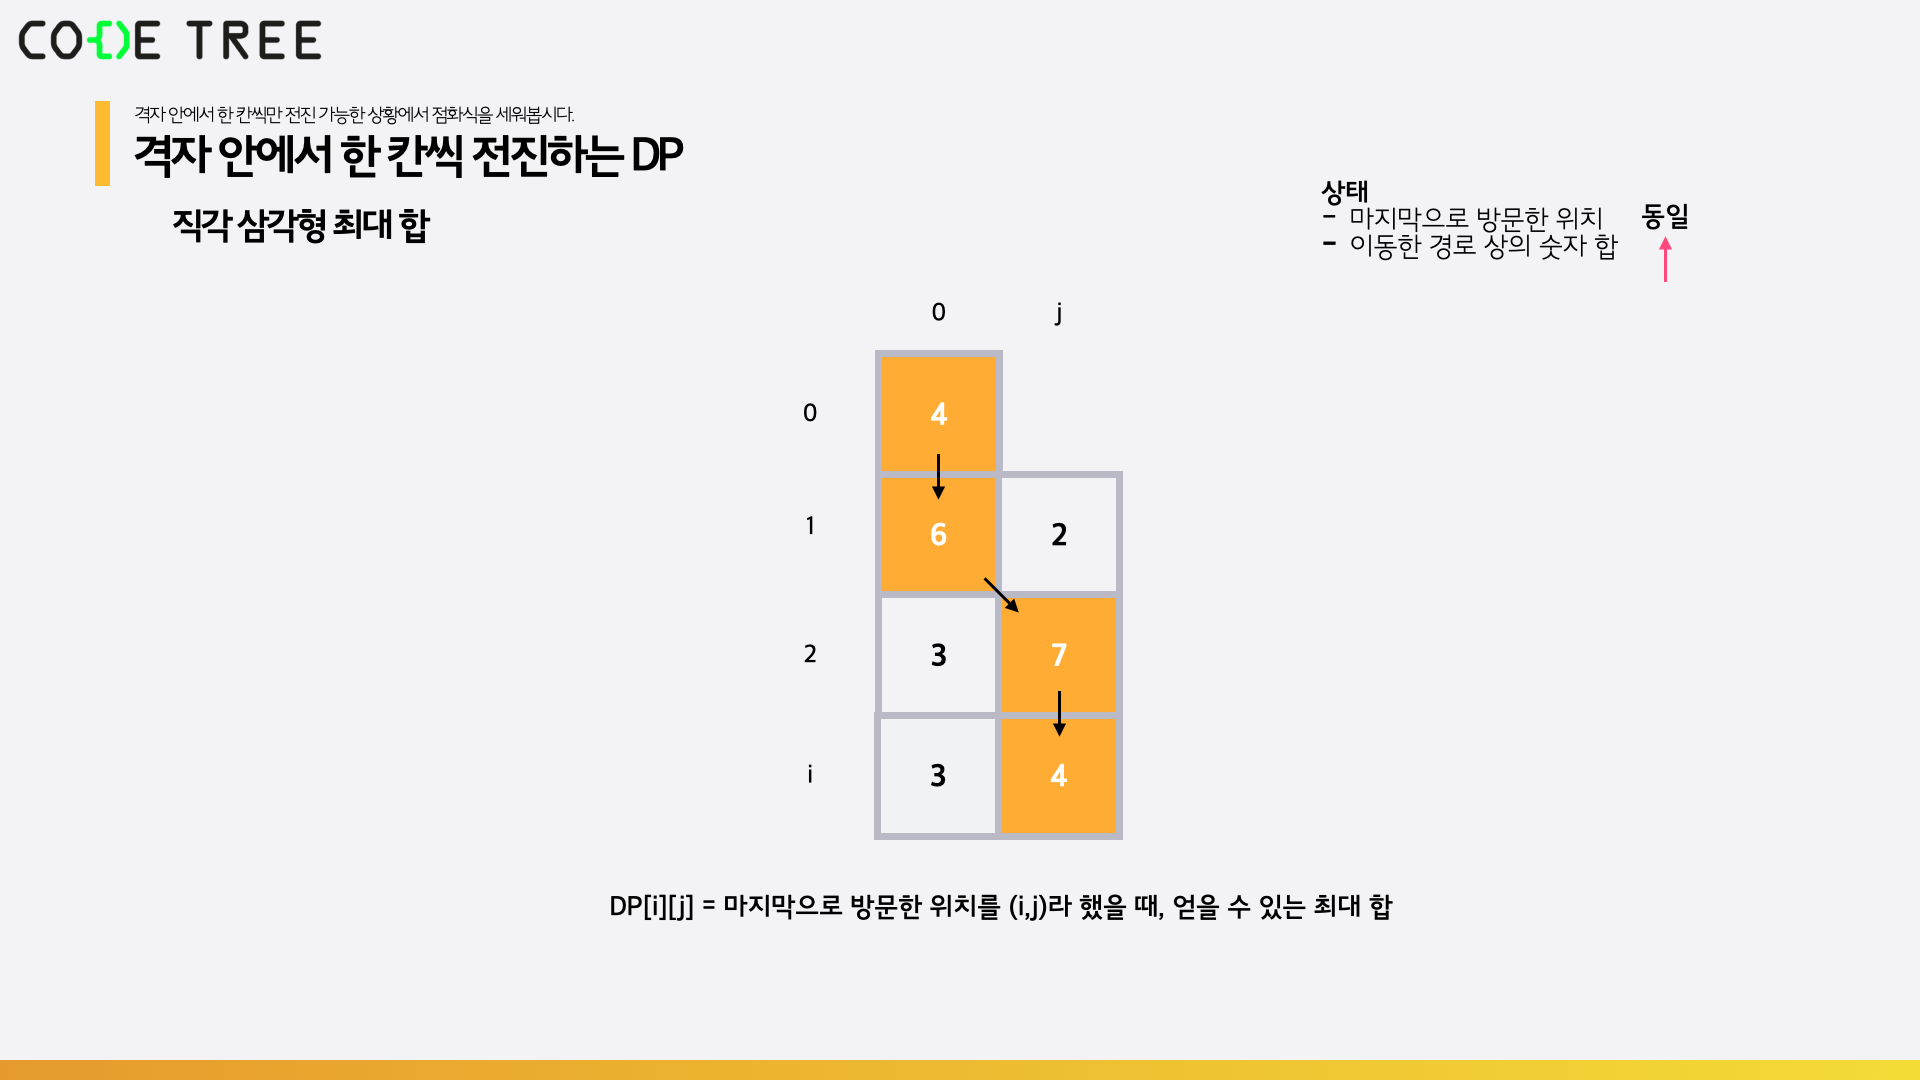

이때 dp[i][j]는 다음과 같이 계산해볼 수 있습니다. 마지막으로 방문한 위치를 (i, j)라 했을 때, 얻을 수 있는 최대 합이라 정의한다면 (i, j)에 도달하는 경우는 다음과 같이 2가지 경우를 생각해볼 수 있을 것입니다. (i, j)에 최종적으로 도달하기 위해서는 바로 위에서 내려오는 경우와, 좌측 모서리에서 내려오는 경우 2가지 밖에 없기 때문에 이 중 더 좋은 경우를 선택해주면 가장 좋은 답을 고를 수 있게 됩니다.

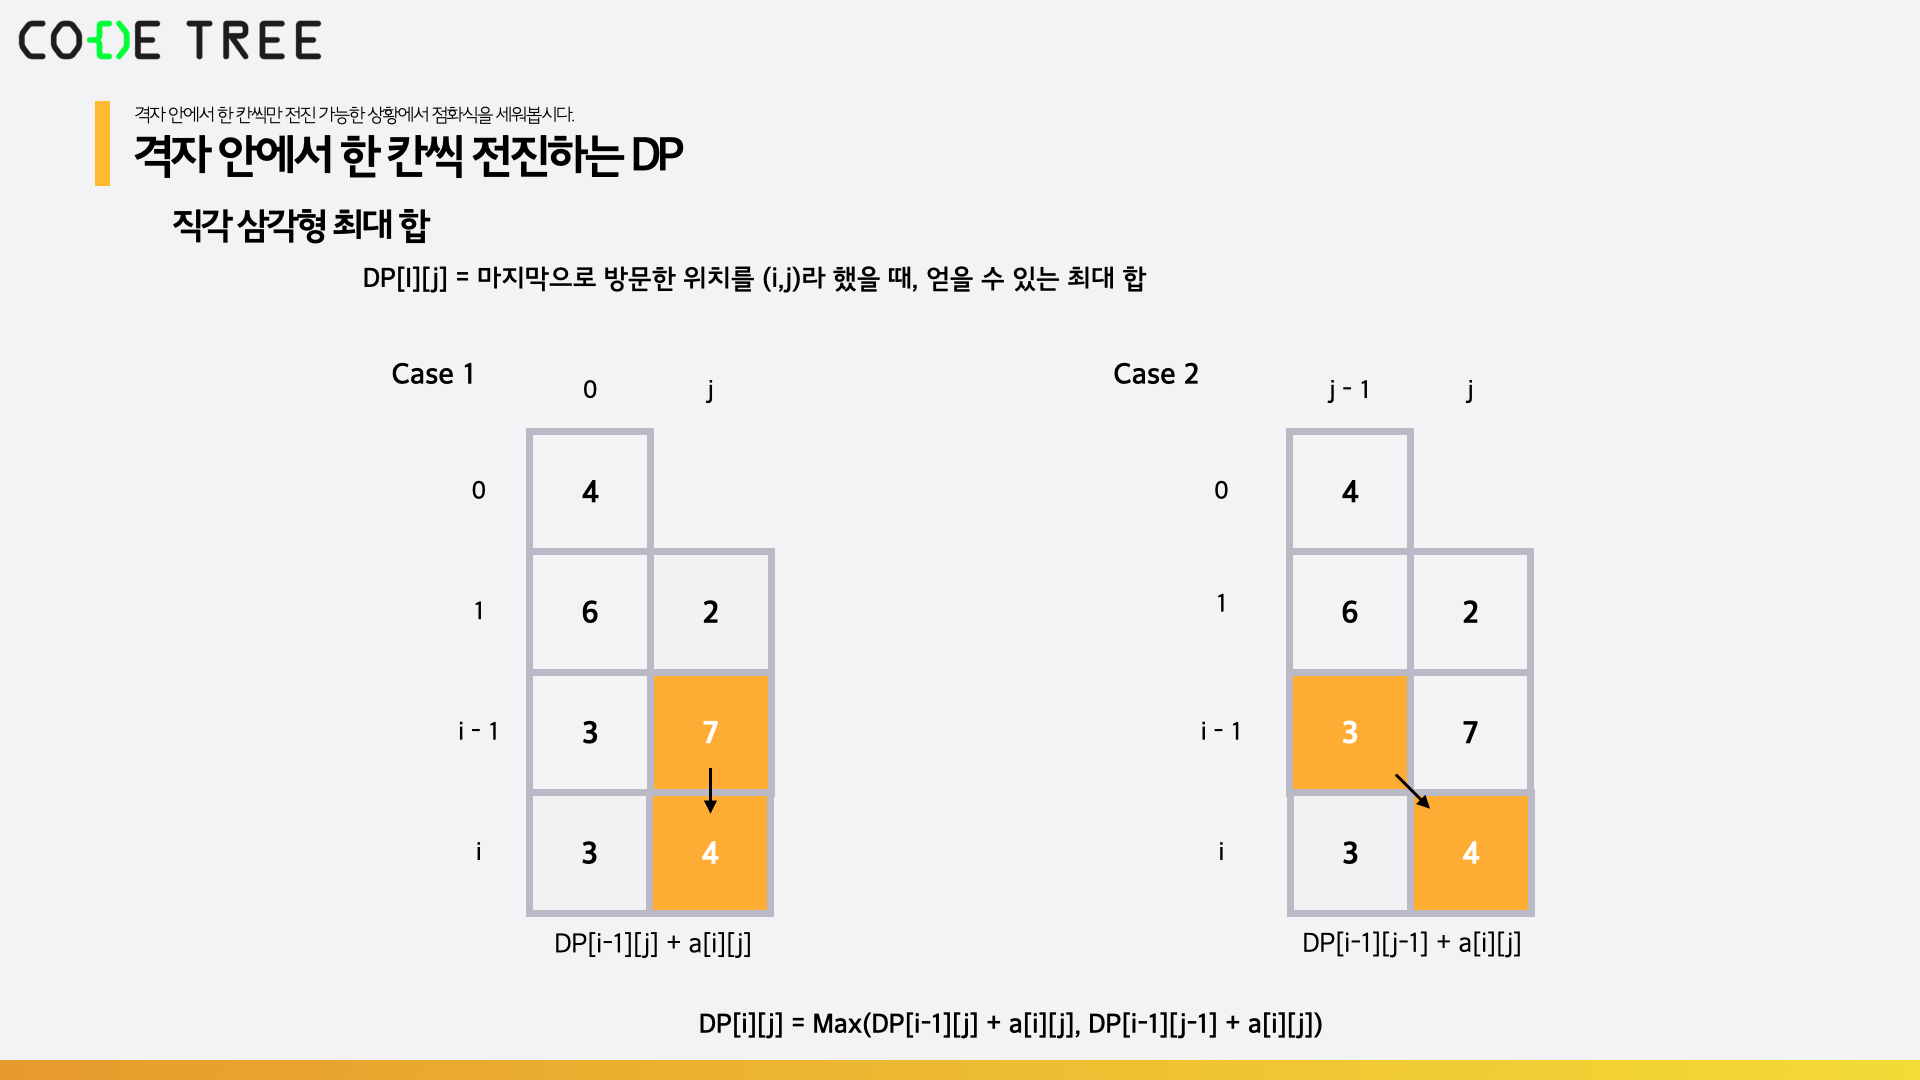

따라서 dp[i][j]의 점화식은 다음과 같습니다.

dp[i][j]=max(dp[i−1][j]+a[i][j],dp[i−1][j−1]+a[i][j])
처음 주어진 다음 예시에 대해 DP 테이블을 채워보도록 하겠습니다.

먼저 시작점은 처음에 적혀있었던 값 그대로 입니다.<br>

DP	0	1	2	3<br>
0	4	-	-	-<br>
1	-	-	-	-<br>
2	-	-	-	-<br>
3	-	-	-	-

첫 번째 열에 해당하는 칸들은 전부 위에서 올 수 밖에 없으므로 위에서 내려오는 경우로 생각하여 순서대로 채워줍니다.<br>

DP	0	1	2	3<br>
1	4	-	-	-<br>
2	10	-	-	-<br>
3	13	-	-	-<br>
4	16	-	-	-

행과 열의 위치가 동일한 대각선에 대해서는 전부 대각선 방향으로 밖에 올 수 없으므로, 대각선 방향으로 내려오는 경우로 생각하여 순서대로 채워줍니다.<br>

DP	1	2	3	4<br>
0	4	-	-	-<br>
1	10	6	-	-<br>
2	13	-	15	-<br>
3	16	-	-	24

이렇게 초기에 확실하게 채워줄 수 있는 부분을 초기 조건이라 부릅니다.

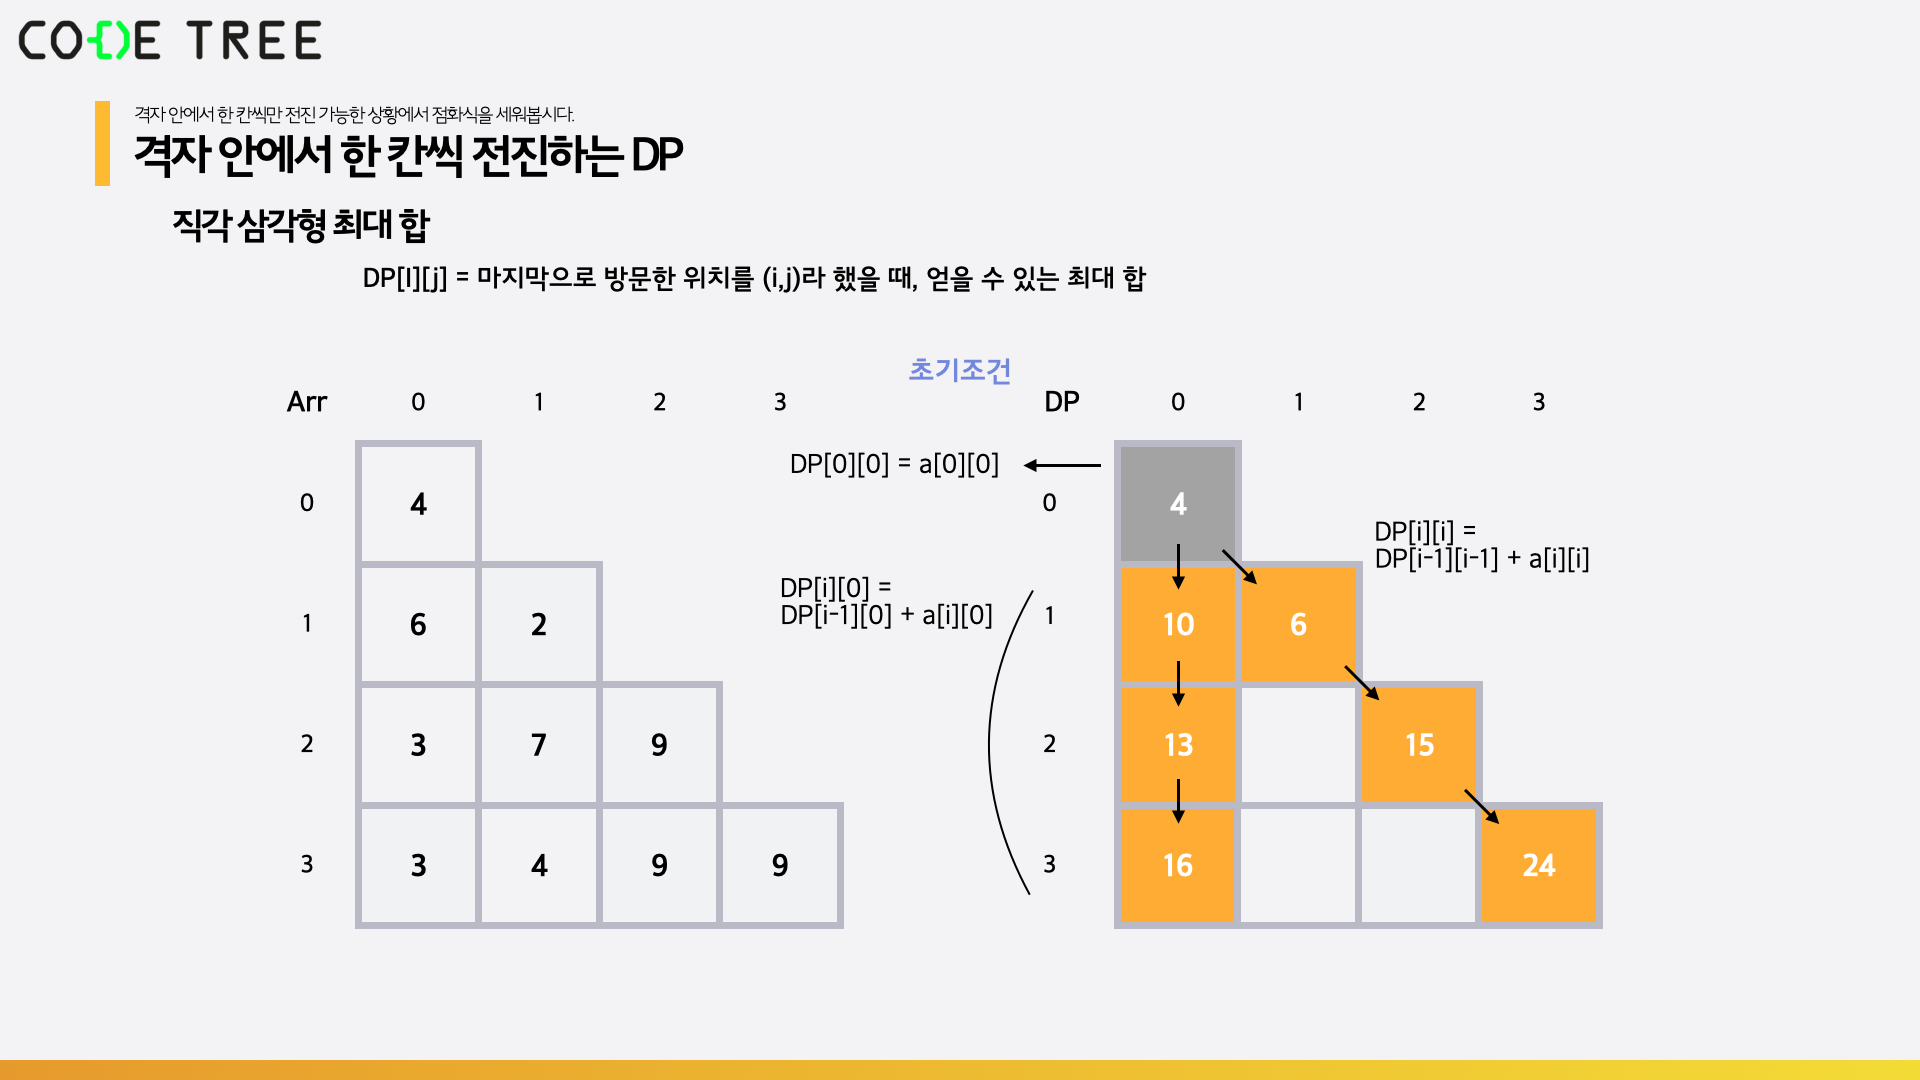

남은 칸들은 위에서 부터 순서대로 왼쪽 -> 오른쪽 방향으로 채워줍니다. 이때 다음 점화식을 이용해 채워줍니다.

dp[i][j]=max(dp[i−1][j]+a[i][j],dp[i−1][j−1]+a[i][j])

그러면 다음과 같은 결과를 얻을 수 있습니다.<br>

DP	0	1	2	3<br>
0	4	-	-	-<br>
1	10	6	-	-<br>
2	13	17	15	-<br>
3	16	21	26	24

이렇게 점화식을 이용해 채우는 경우에는 항상 작은 문제가 먼저 풀려있다는 가정 하에서 큰 문제가 풀려야 합니다. 격자 안에서 한 칸씩 전진하는 DP 유형의 경우, 위 -> 아래, 왼쪽 -> 오른쪽 방향으로 즉, 일반적으로 for문을 진행하던 방향으로 진행하면 dp[i][j]는 더 작은 문제들이 풀려있는 상황에서 그 값을 이용하여 원하는 결과를 계산할 수 있습니다.

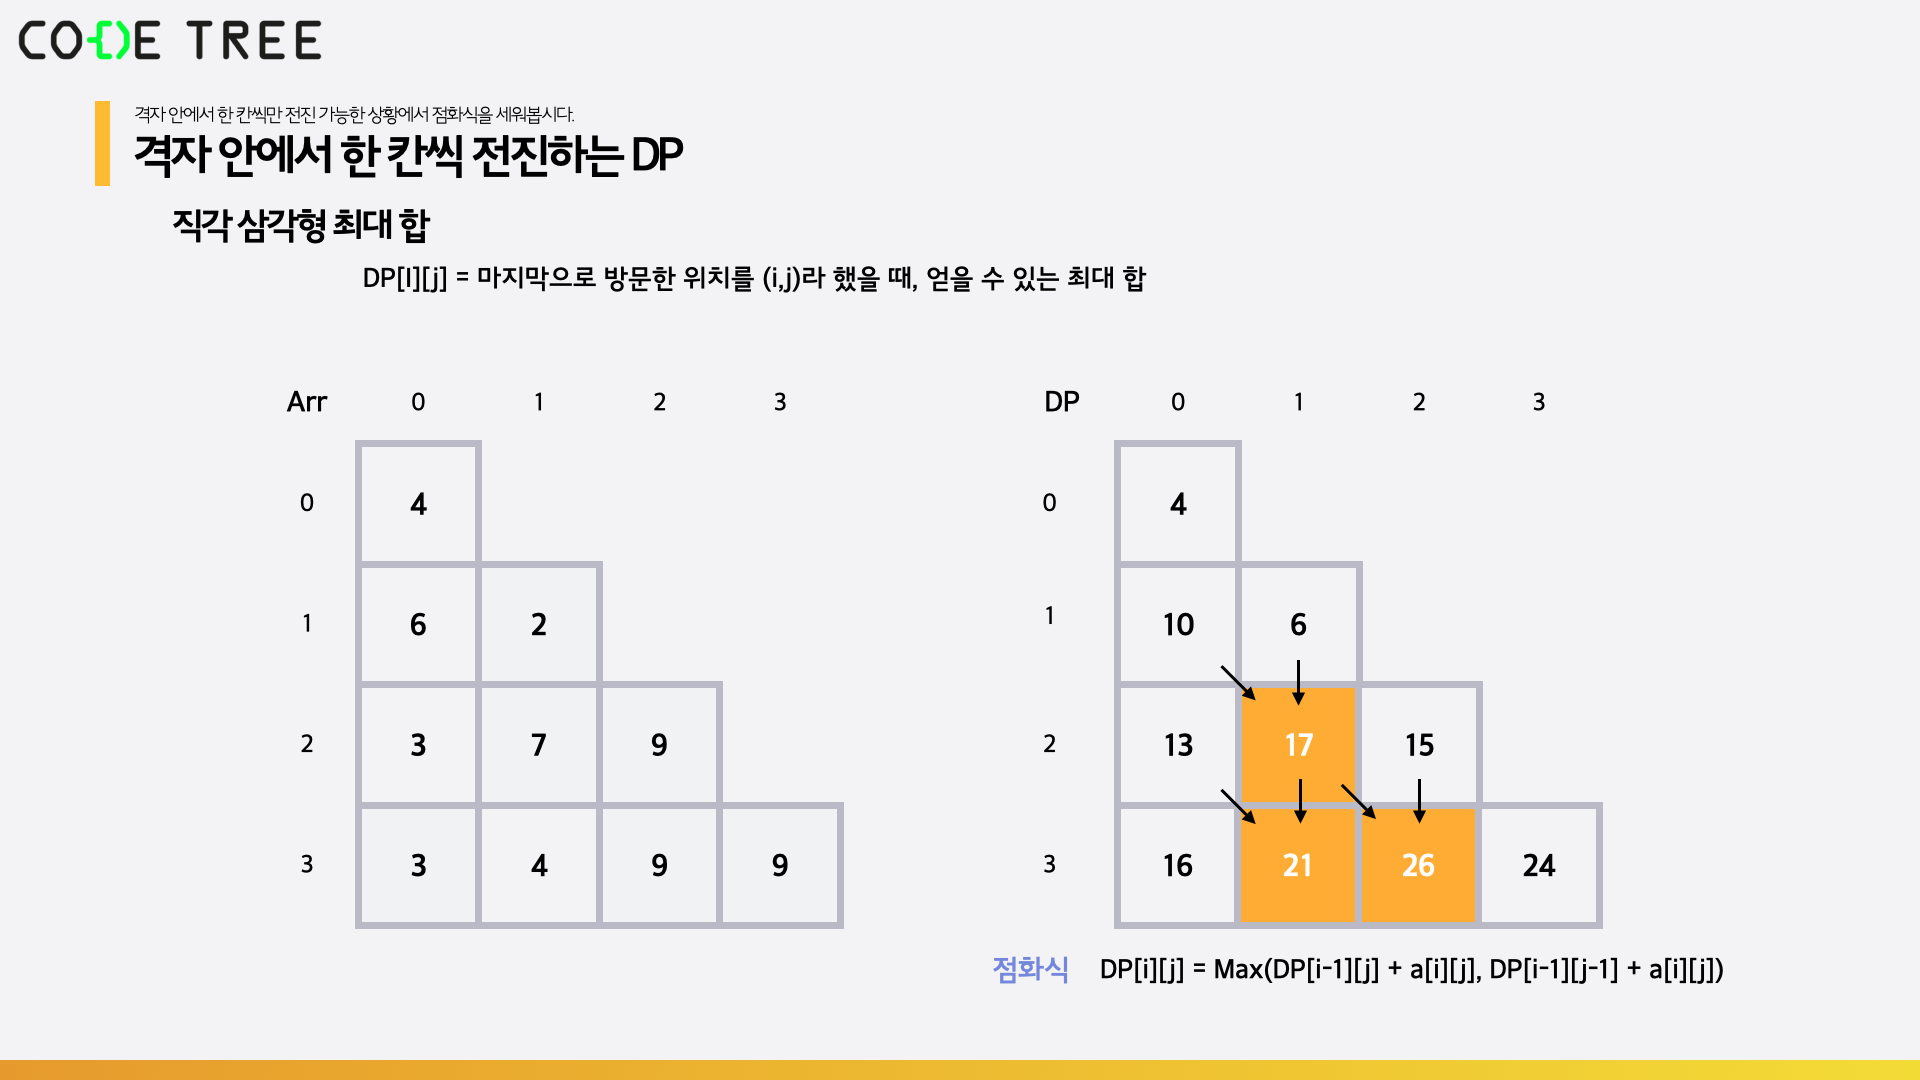

DP 테이블을 전부 채우고 나면, 가장 끝 행에 도달할 수 있는 경우 중 최대 합이 되는 경우를 선택해야 하므로 답은 26이 됩니다.

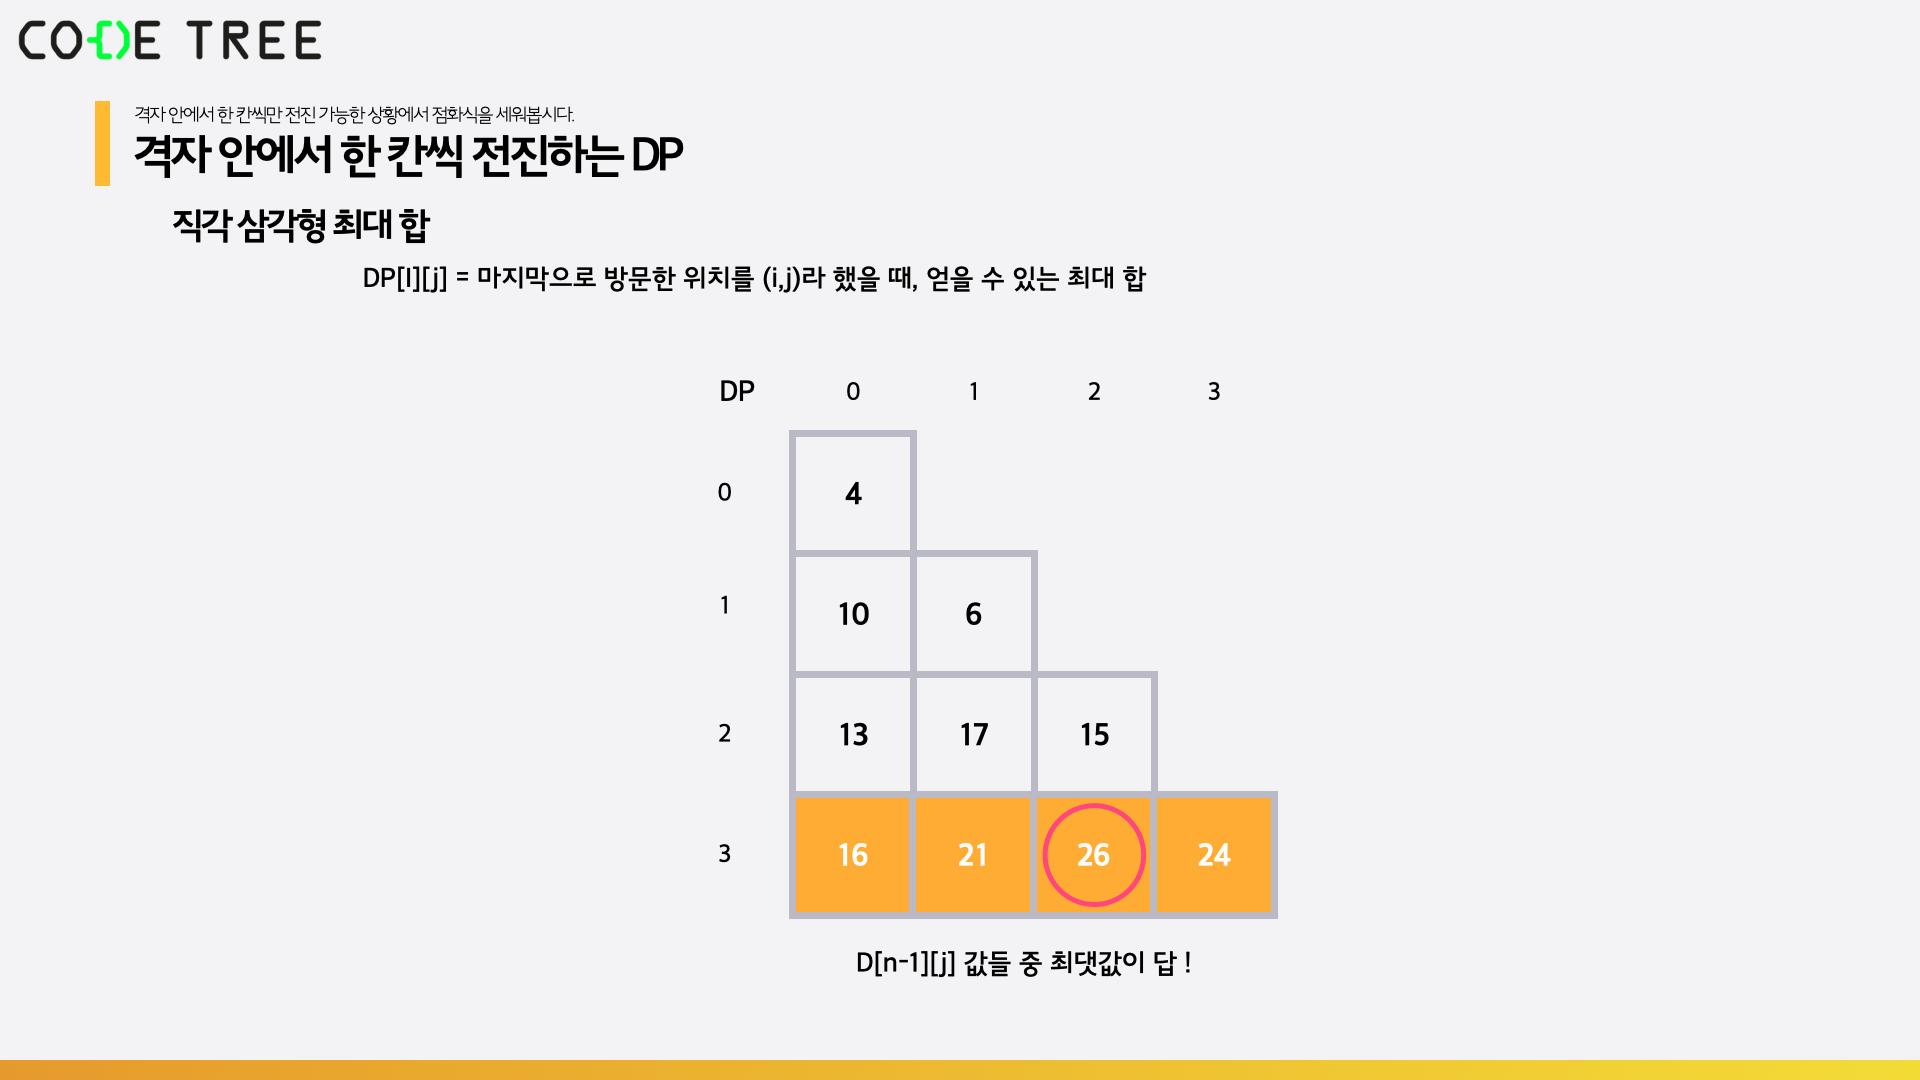